<b>Linear Discriminant Analysis (LDA) is a statistical technique used for classification and dimensionality reduction. It is commonly employed in machine learning and statistics to find the linear combinations of features that best separate two or more classes in a dataset.</b>

<b>Classification and Discrimination</b>

*   LDA is primarily used for classification problems where the goal is to
    distinguish between two or more classes based on a set of features.

*   It aims to find a linear combination of features that characterizes or
    discriminates between the classes.

<b>Dimensionality Reduction</b>

*   Besides its classification utility, LDA also serves as a dimensionality
    reduction technique.

*   It transforms the original features into a lower-dimensional space while
    preserving the discriminatory information between classes.

<b>Basic Idea</b>

*   LDA seeks a projection of the data in such a way that the separation
    between the classes is maximized while the variance within each class is minimized.

<b>Key Steps:</b>

*   <b>Compute Class Means:</b>

     Calculate the mean vectors for each class in the feature space.

*   <b>Projection:</b>

    Project the original data onto the subspace spanned by the selected
    principal components. This reduces the dimensionality of the data while retaining as much variance as possible.

*   <b>Compute Scatter Matrices:</b>

    Calculate the within-class scatter matrix and the between-class scatter
    matrix.

*   <b>Solve Eigenvalue Problem:</b>

    Find the eigenvectors and eigenvalues of the matrix product of the inverse of the within-class scatter matrix and the between-class scatter matrix.

*   <b>Select Discriminant Vectors:</b>

    The eigenvectors corresponding to the largest eigenvalues become the
    discriminant vectors.

*   <b>Decision Rule:</b>

    In the reduced-dimensional space, a decision rule is established to
    classify new data points into one of the predefined classes.

<b>Assumptions:</b>

*   LDA assumes that the features are normally distributed and that the
    covariance matrices of the classes are equal.

<b>Comparison with Principal Component Analysis (PCA):</b>

*   LDA is often compared with PCA, another dimensionality reduction technique.
    While PCA focuses on capturing maximum variance in the data, LDA emphasizes class separability.

<b>Applications:</b>

  LDA is widely used in various fields such as pattern recognition, image processing, and bioinformatics.</b>


## Import Libraries

In [1]:
pip install pydataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 73.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939416 sha256=0ce4632d620c68f25415dba935e4ae3ff807974963cea2dc011750b3b1017b2c
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [35]:
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics


## Load the biochemist dataset from pydataset

In [36]:
df=data('bioChemists')
df

,art,fem,mar,kid5,phd,ment
1,0,Men,Married,0,2.52,7
2,0,Women,Single,0,2.05,6
3,0,Women,Single,0,3.75,6
4,0,Men,Married,1,1.18,3
5,0,Women,Single,0,3.75,26
...,...,...,...,...,...,...
911,11,Men,Married,2,2.86,7
912,12,Men,Married,1,4.29,35
913,12,Men,Married,1,1.86,5
914,16,Men,Married,0,1.74,21


In [37]:
df.columns


Index(['art', 'fem', 'mar', 'kid5', 'phd', 'ment'], dtype='object')

## Dummy Variables

In [38]:
FEMALE=pd.get_dummies(df['fem'],drop_first=True)
df=pd.concat([df,FEMALE],axis=1)
MARRIED=pd.get_dummies(df['mar'],drop_first=True)
df=pd.concat([df,MARRIED],axis=1)
df.drop(["fem","mar"],axis=1,inplace=True)
df.head()


,art,kid5,phd,ment,Women,Single
1,0,0,2.52,7,0,0
2,0,0,2.05,6,1,1
3,0,0,3.75,6,1,1
4,0,1,1.18,3,0,0
5,0,0,3.75,26,1,1


## Seperate independent and dependent variables

In [39]:
x=df[["art","kid5","phd","ment","Women"]]
y=df['Single']

## Train and Test Dataset

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((732, 5), (183, 5), (732,), (183,))

## Model training and testing using LDA model

In [55]:
clf=LDA(n_components=1)
lda_data=clf.fit(x_train,y_train)
lda_data_score=clf.score(x_train,y_train)
lda_data_score

0.7226775956284153

In [26]:
y_pred=clf.predict(x_test)

##  Evaluation


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       122
           1       0.58      0.56      0.57        61

    accuracy                           0.72       183
   macro avg       0.68      0.68      0.68       183
weighted avg       0.71      0.72      0.71       183



## Visualization

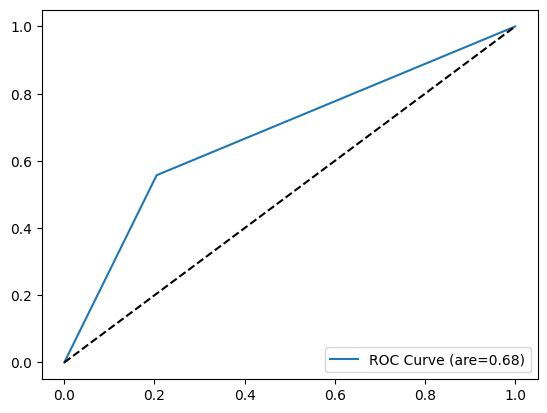

In [28]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc
plt.clf()
plt.plot(fpr,tpr,label="ROC Curve (are=%0.2f)" % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.legend(loc='lower right')

In [29]:
print(roc_auc)
print(fpr)
print(tpr)
print(thresholds)

0.6762295081967213
[0.         0.20491803 1.        ]
[0.         0.55737705 1.        ]
[2 1 0]


## Plotting the graph

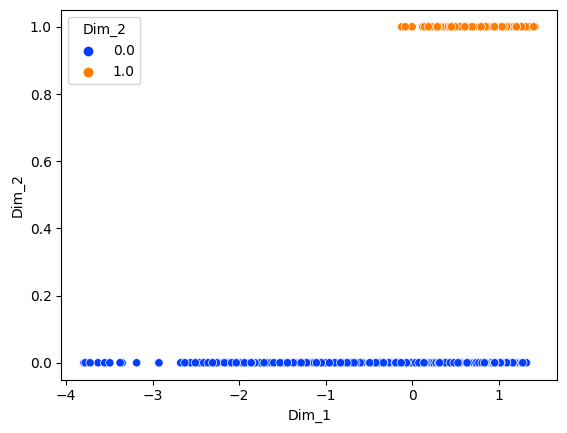

In [61]:
import numpy as np
import seaborn as sns
lda_data = np.vstack((data_plot.T, y)).T
lda_df = pd.DataFrame(data = lda_data, columns =("Dim_1","Dim_2"))
sns.scatterplot(data=lda_df, x='Dim_1', y="Dim_2",hue="Dim_2",palette="bright")
plt.show()

#### '1' means 'single', '0' means 'married', SO we have a clear cluster


## Comparision using PCA


## Import PCA

In [30]:
from sklearn.decomposition import PCA
my_pca = PCA(n_components=2)
my_pca.fit(x)
x_pca = my_pca.transform(x)
print(x_pca)

[[-1.88699865 -1.54557565]
 [-2.90199171 -1.50144967]
 [-2.85571393 -1.51318651]
 ...
 [-3.12483515 10.52469067]
 [13.08703456 13.51688134]
 [34.23171904 15.16013581]]


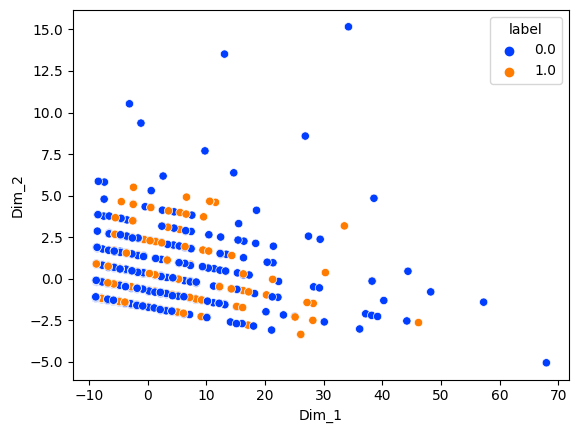

In [31]:
import numpy as np
import seaborn as sns
pca_data = np.vstack((x_pca.T, y)).T
pca_df = pd.DataFrame(data = pca_data, columns =("Dim_1", "Dim_2", "label"))
sns.scatterplot(data=pca_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
plt.show()

#### No clear cluster

### The features obtained are the 2d eigen vectors

In [62]:
x_pca.shape

(915, 2)

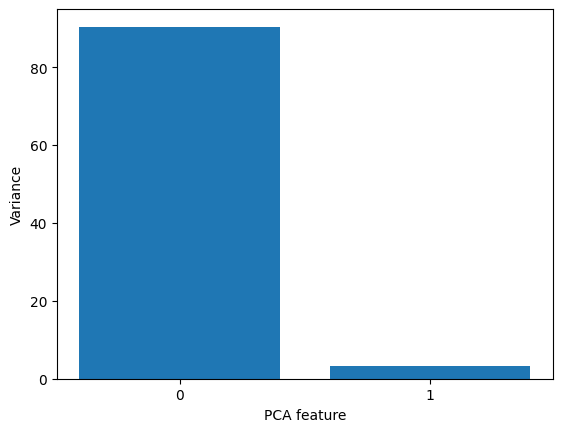

In [63]:
# Plot the explained variances

import matplotlib.pyplot as plt

features = range(my_pca.n_components_)
plt.bar(features, my_pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()


In [64]:
y

1      0
2      1
3      1
4      0
5      1
      ..
911    0
912    0
913    0
914    0
915    0
Name: Single, Length: 915, dtype: uint8

## Import model

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
xtrain,xtest,ytrain,ytest = train_test_split(x_pca,y,train_size=0.8,random_state=6)
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
result = model.score(xtest,ytest)
print(result)

0.6338797814207651


## As the score of PCA is lesser than LDA, so model LDA is better